In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# get feature names from the file features.txt
features = list()
with open('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features: {}'.format(len(features)))

No of Features: 561


In [22]:
seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

In [23]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# # add subject column to the dataframe
X_train['subject'] = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# # put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [24]:
import pandas as pd

# Get the data from txt files to pandas dataffame
X_train = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# Add subject column to the dataframe
subject_train = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/subject_train.txt', header=None)
X_train['subject'] = subject_train

y_train = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/y_train.txt', names=['Activity'])
y_train_labels = y_train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# Put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4839,0.307562,-0.021432,-0.142488,-0.374555,0.055643,0.09963,-0.420065,-0.024011,0.113833,-0.163556,...,-0.522562,0.753168,-0.863103,-0.578452,-0.63588,0.227727,0.240258,23,2,WALKING_UPSTAIRS


In [25]:
train.shape

(7352, 564)

In [26]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [30]:
import pandas as pd

# Get the data from txt files to pandas dataframes for the test dataset
X_test = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

# Add subject column to the dataframe
subject_test = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/subject_test.txt', header=None)
X_test['subject'] = subject_test.values  # Use .values to extract the underlying NumPy array

# Get y labels from the txt file
y_test = pd.read_csv('/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/y_test.txt', names=['Activity'])

# Map activity labels to their names
y_test_labels = y_test['Activity'].map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})



In [31]:
# Create the 'ActivityName' column
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2309,0.267821,-0.017353,-0.106471,-0.98881,-0.991891,-0.993346,-0.98855,-0.991778,-0.994011,-0.935941,...,-0.087983,-0.242916,-0.25765,-0.37738,0.620923,-0.581037,-0.42231,20,6,LAYING


In [32]:
test.shape

(2947, 564)

1. Check for Duplicates

In [33]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


2. Checking for NaN/null values

In [34]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


3. Check for data imbalance

In [35]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

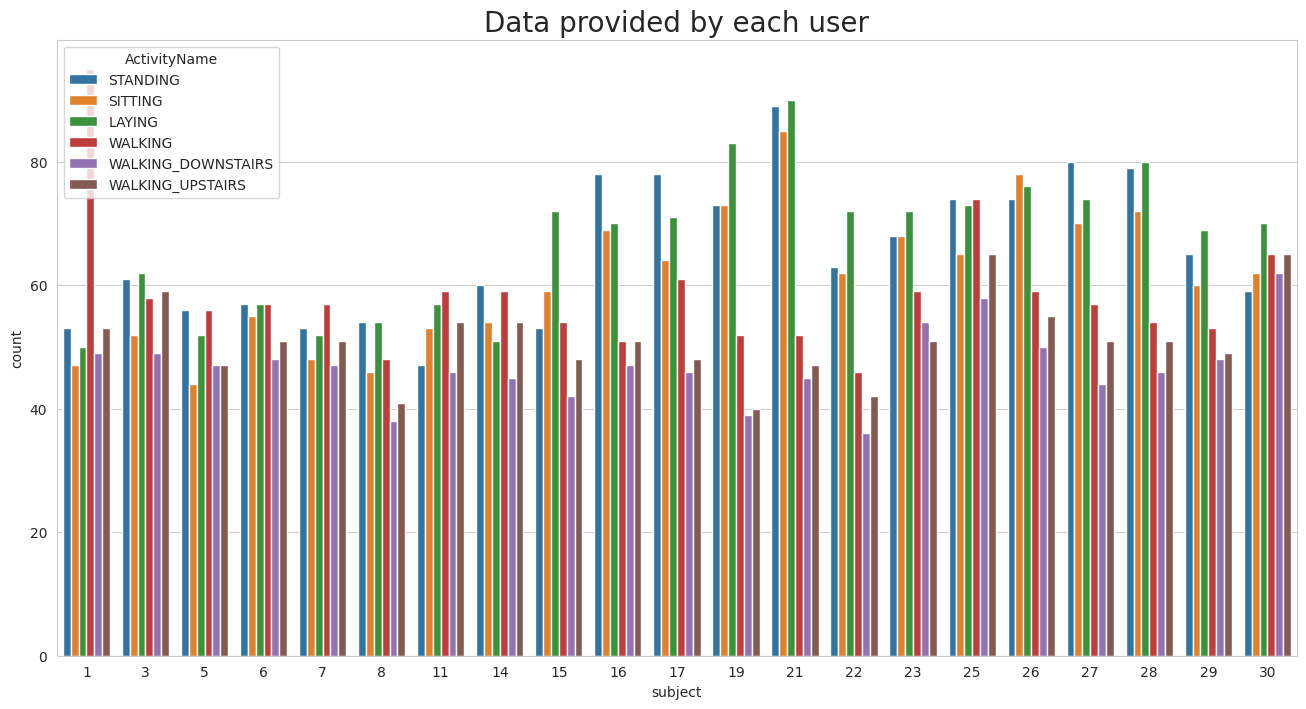

In [36]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

 We have got almost same number of reading from all the subjects

ValueError: could not convert string to float: 'STANDING'

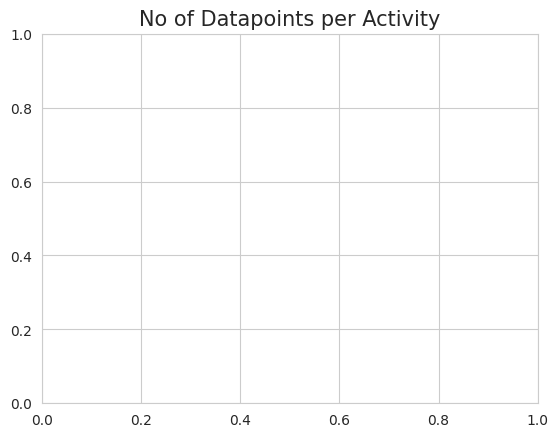

In [37]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

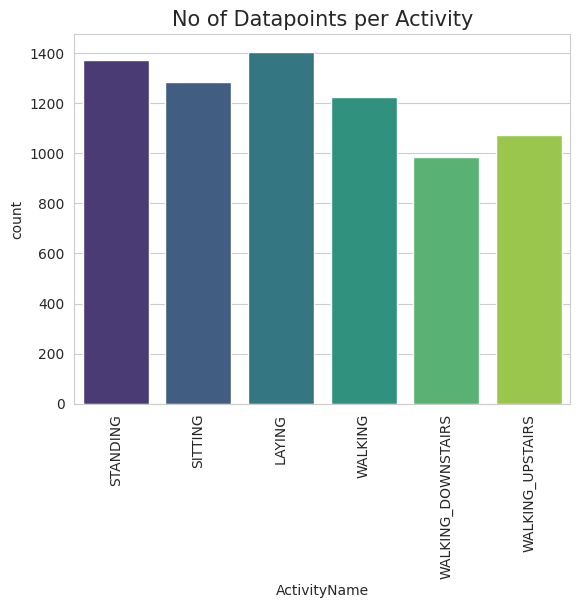

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the title and labels
plt.title('No of Datapoints per Activity', fontsize=15)
plt.xticks(rotation=90)

# Create the countplot
sns.countplot(data=train, x='ActivityName', palette='viridis')

# Show the plot
plt.show()


4. Changing feature names

In [39]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

5. Save this dataframe in a csv files

In [42]:
%mkdir /kaggle/working/test

In [44]:
train.to_csv('/kaggle/working/train/train.csv', index=False)
test.to_csv('/kaggle/working/test/test.csv', index=False)

In [ ]:
# get feature names from the file features.txt
features = list()
with open('/kaggle/input/ucihar-dataset') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features: {}'.format(len(features)))